## Prediction of Covid-19 Cases
In this notebook we are going to build a michine learning model for prediction the number of covid-19 cases

**(This is a Regression problem)**

### Problem Statement:
* problem 1 : Predicting the covi cases in different cities in India on september 1-2020

* problem 2 : Create a time series prediction model for the forign visitors and use the prediction to calculate the covid cases for the cities in test-dataset

### Data :
`Train_dataset.csv` - is a training set which contains data on september 1
`Test_dataset.csv` - is a test set where we have to predict the covid cases

## Evaluation :
The evaluation metrics are selected as RMSLE (root mean squared log error), MSE (mean squared error),R^2 

The goal is to reduce the error and get R^2 closer to 1 

## Features:
Flipr has provided with exel file explaining all the features given in the data set 


In [1]:
## Importing the Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
%matplotlib inline

In [2]:
# importing the excel files
df = pd.read_excel("Train_dataset.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [4]:
df.head().T

,0,1,2,3,4
City,Mumbai,Delhi,Bangalore,Hyderabad,Ahmedabad
State,Maharashtra,Delhi,Karnataka,Telangana,Gujarat
Type,M.C,M.C,MPUA,MPUA,MPUA
Population [2011],1.24424e+07,1.10078e+07,8.43668e+06,6.80997e+06,5.57058e+06
Popuation [2001],1.19784e+07,9.87917e+06,4.30133e+06,3.63748e+06,3.52008e+06
Sex Ratio,878,858,936,930,852
Median Age,23,27,28,23,29
Avg Temp,32,30,37,31,25
SWM,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW
Toilets Avl,219,215,212,217,227


In [5]:
df_temp = df

# Covert the string coulumns to categories 

In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [7]:
## Check which coulums contains strings
for label, content in  df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

City
State
Type
SWM


In [8]:
## converting the string coulums to categories 
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]= df_temp[label].astype("category")

In [9]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               787 non-null    category
 1   State              787 non-null    category
 2   Type               787 non-null    category
 3   Population [2011]  739 non-null    float64 
 4   Popuation [2001]   295 non-null    float64 
 5   Sex Ratio          777 non-null    float64 
 6   Median Age         769 non-null    float64 
 7   Avg Temp           770 non-null    float64 
 8   SWM                783 non-null    category
 9   Toilets Avl        761 non-null    float64 
 10  Water Purity       629 non-null    float64 
 11  H Index            647 non-null    float64 
 12  Female Population  646 non-null    float64 
 13  # of hospitals     772 non-null    float64 
 14  Foreign Visitors   697 non-null    float64 
 15  Covid Cases        787 non-null    int64   
dtypes: categ

## Filling the missing numeric data 

The missing values are filled with the mean of the column

Lets assume the population difference between 2001 and 2011 is 25 percent.

In [10]:
# filling pouation [2001]column with 25% less values from the population [2011] column
df_temp["Popuation [2001]"]= df_temp["Population [2011]"]-(df_temp["Population [2011]"]*0.25)

In [11]:
df_temp.isna().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]      48
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [12]:
## colums having missing values 
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Population [2011]
Popuation [2001]
Sex Ratio
Median Age
Avg Temp
Toilets Avl
Water Purity
H Index
Female Population
# of hospitals
Foreign Visitors


In [13]:
## filling the missing values with median
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## create a is_missing col to indicate the value has been filled or not 
            df_temp[label+"_is_missing"] = pd.isnull(content)
            ## filling the missing values with median of its respective column
            df_temp[label]= content.fillna(content.median())

In [14]:
df_temp.isna().sum()

City                            0
State                           0
Type                            0
Population [2011]               0
Popuation [2001]                0
Sex Ratio                       0
Median Age                      0
Avg Temp                        0
SWM                             4
Toilets Avl                     0
Water Purity                    0
H Index                         0
Female Population               0
# of hospitals                  0
Foreign Visitors                0
Covid Cases                     0
Population [2011]_is_missing    0
Popuation [2001]_is_missing     0
Sex Ratio_is_missing            0
Median Age_is_missing           0
Avg Temp_is_missing             0
Toilets Avl_is_missing          0
Water Purity_is_missing         0
H Index_is_missing              0
Female Population_is_missing    0
# of hospitals_is_missing       0
Foreign Visitors_is_missing     0
dtype: int64

## Filling and converting the categorical columns to numeric 

In [15]:
for label , content in df_temp.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

City
State
Type
SWM


In [16]:
for label , content in df_temp.items():
    if pd.api.types.is_categorical_dtype(content):
        ## adding a is_missing col to indicate the value is missing or not 
        df_temp[label+"_is_missing"]= pd.isnull(content)
        # we add +1 because the pandas encodes missing categories as numbers
        df_temp[label] = pd.Categorical(content).codes+1
        

In [17]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          787 non-null    int16  
 1   State                         787 non-null    int8   
 2   Type                          787 non-null    int8   
 3   Population [2011]             787 non-null    float64
 4   Popuation [2001]              787 non-null    float64
 5   Sex Ratio                     787 non-null    float64
 6   Median Age                    787 non-null    float64
 7   Avg Temp                      787 non-null    float64
 8   SWM                           787 non-null    int8   
 9   Toilets Avl                   787 non-null    float64
 10  Water Purity                  787 non-null    float64
 11  H Index                       787 non-null    float64
 12  Female Population             787 non-null    float64
 13  # of 

#### All the missing values are filled and the columns are converted to numeric

## Modelling

The dataset has been cleaned and is ready for modelling 

Following the Scikit-Learn machine learning map, (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

According to the chart lets try **Ridge regression** first

In [18]:
## Ridge Regression 
from sklearn.linear_model import Ridge

# Instantiate the model 
model_ridge = Ridge(alpha=0.5)

# Fitting the model to the data_set 
model_ridge.fit(df_temp.drop("Covid Cases",axis=1),df_temp["Covid Cases"])

# getting the score for the model
model_ridge.score(df_temp.drop("Covid Cases",axis=1),df_temp["Covid Cases"])

0.6034154720391126

**Random Forest Regression**

In [19]:
## RandomForestRegression 
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model_rfr = RandomForestRegressor()

# Fitting the model to the dataset
model_rfr.fit(df_temp.drop("Covid Cases",axis=1),df_temp["Covid Cases"])

# getting the score for the model
model_rfr.score(df_temp.drop("Covid Cases",axis=1),df_temp["Covid Cases"])

0.9388937952236175

**Gradiant boosting Regressor (XGBOOT)**

In [20]:
## XGBOOST
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model 
model_gbr = GradientBoostingRegressor()

# Fitting the model to the dataset 
model_gbr.fit(df_temp.drop("Covid Cases",axis=1),df_temp["Covid Cases"])

# Scoring the model 
model_gbr.score(df_temp.drop("Covid Cases",axis=1),df_temp["Covid Cases"])


0.9868085490385676

## Splitting the data into training and validation sets 

The data needs to be split in order for us to train the model and evaluvate the model based on scoring the model using validation set 

In [21]:
X = df_temp.drop("Covid Cases",axis=1)
y = df_temp["Covid Cases"]

In [22]:
## Splitting the model into training and test sets 
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2)

## Creating an evaluvation/scoring function

In [23]:
## Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_valid, y_preds):
    return np.sqrt(mean_squared_log_error(y_valid, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, valid_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [24]:
## Random Forest Regression
model_rfr.fit(X_train,y_train)
show_scores(model_rfr)

{'Training MAE': 961.8895548489667,
 'Valid MAE': 2323.979936708861,
 'Training RMSLE': 0.26828840519413305,
 'Valid RMSLE': 0.4729194106601779,
 'Training R^2': 0.9309781932646595,
 'Valid R^2': 0.741505035708836}

## Hyperparameter tuning

In [31]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [500]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter = 300,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  3.4min finished


Wall time: 3min 21s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=300,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [32]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 500,
 'max_features': 'auto',
 'max_depth': 10}

In [33]:
show_scores(rs_model)

{'Training MAE': 1675.1545149352373,
 'Valid MAE': 2189.6527362296656,
 'Training RMSLE': 0.3801034225996213,
 'Valid RMSLE': 0.4855218747192536,
 'Training R^2': 0.7797946135908661,
 'Valid R^2': 0.7933500965399471}

In [53]:
ideal_model = RandomForestRegressor(n_estimators= 40,
                                    min_samples_split= 6,
                                    min_samples_leaf= 3,
                                    max_samples= 500,
                                    max_features= 'auto',
                                    max_depth= 10)

In [54]:
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_samples=500, min_samples_leaf=3,
                      min_samples_split=6, n_estimators=40)

## Preprocessing the test data 

In [35]:
df_test = pd.read_excel("Test_dataset.xlsx")

In [36]:
## Check which coulums contains strings
for label, content in  df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

City
State
Type
SWM


In [37]:
## converting the string coulums to categories 
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]= df_test[label].astype("category")

In [38]:
# filling pouation [2001]column with 25% less values from the population [2011] column
df_test["Popuation [2001]"]= df_test["Population [2011]"]-(df_test["Population [2011]"]*0.25)

In [40]:
## filling the missing values with median
for label , content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## create a is_missing col to indicate the value has been filled or not 
            df_test[label+"_is_missing"] = pd.isnull(content)
            ## filling the missing values with median of its respective column
            df_test[label]= content.fillna(content.median())

In [41]:
df_test.isna().sum()

City                            0
State                           0
Type                            2
Population [2011]               0
Popuation [2001]                0
Sex Ratio                       0
Median Age                      0
Avg Temp                        0
SWM                             9
Toilets Avl                     0
Water Purity                    0
H Index                         0
Female Population               0
# of hospitals                  0
Foreign Visitors                0
Population [2011]_is_missing    0
Popuation [2001]_is_missing     0
Sex Ratio_is_missing            0
Median Age_is_missing           0
Avg Temp_is_missing             0
Toilets Avl_is_missing          0
Water Purity_is_missing         0
H Index_is_missing              0
Female Population_is_missing    0
# of hospitals_is_missing       0
Foreign Visitors_is_missing     0
dtype: int64

In [43]:
for label , content in df_test.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

City
State
Type
SWM


In [44]:
for label , content in df_test.items():
    if pd.api.types.is_categorical_dtype(content):
        ## adding a is_missing col to indicate the value is missing or not 
        df_test[label+"_is_missing"]= pd.isnull(content)
        # we add +1 because the pandas encodes missing categories as numbers
        df_test[label] = pd.Categorical(content).codes+1
        

In [45]:
df_test.isna().sum()

City                            0
State                           0
Type                            0
Population [2011]               0
Popuation [2001]                0
Sex Ratio                       0
Median Age                      0
Avg Temp                        0
SWM                             0
Toilets Avl                     0
Water Purity                    0
H Index                         0
Female Population               0
# of hospitals                  0
Foreign Visitors                0
Population [2011]_is_missing    0
Popuation [2001]_is_missing     0
Sex Ratio_is_missing            0
Median Age_is_missing           0
Avg Temp_is_missing             0
Toilets Avl_is_missing          0
Water Purity_is_missing         0
H Index_is_missing              0
Female Population_is_missing    0
# of hospitals_is_missing       0
Foreign Visitors_is_missing     0
City_is_missing                 0
State_is_missing                0
Type_is_missing                 0
SWM_is_missing

In [46]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          787 non-null    int16  
 1   State                         787 non-null    int8   
 2   Type                          787 non-null    int8   
 3   Population [2011]             787 non-null    float64
 4   Popuation [2001]              787 non-null    float64
 5   Sex Ratio                     787 non-null    float64
 6   Median Age                    787 non-null    float64
 7   Avg Temp                      787 non-null    float64
 8   SWM                           787 non-null    int8   
 9   Toilets Avl                   787 non-null    float64
 10  Water Purity                  787 non-null    float64
 11  H Index                       787 non-null    float64
 12  Female Population             787 non-null    float64
 13  # of 

## making prediction on the training set

In [55]:
test_preds = ideal_model.predict(df_test)


In [57]:
new_test = pd.read_excel('Test_dataset.xlsx')

In [58]:
df_preds = pd.DataFrame()
df_preds["City"] = new_test["City"]
df_preds["Covid Cases"] = test_preds
df_preds

,City,Covid Cases
0,Tuensang,2134.893005
1,Lakshmeshwar,2293.170234
2,Zira,2639.040256
3,Yawal,2278.554413
4,Thana Bhawan,2498.694151
...,...,...
496,Nandaprayag,2269.339393
497,Kirtinagar,2339.315223
498,Kedarnath,2259.470680
499,Gangotri,2307.849854


In [63]:
#exporting predictions as excel file
df_preds.to_excel("covid-19-cases-predictions.xlsx", index=False)

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable

In [64]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([9.09031996e-03, 9.84372524e-03, 1.82556560e-04, 3.42380852e-01,
       1.84343361e-01, 6.13668922e-03, 1.93301766e-03, 1.20491337e-03,
       2.63646375e-03, 5.66532096e-02, 2.77683065e-02, 1.58029006e-02,
       1.87006842e-01, 6.29295578e-02, 9.11378678e-02, 4.41836776e-07,
       1.44026092e-06, 3.92556714e-07, 0.00000000e+00, 2.04919144e-05,
       1.36574998e-06, 2.40732428e-04, 7.71285459e-07, 4.19038305e-06,
       3.67634956e-04, 3.11956496e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [65]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

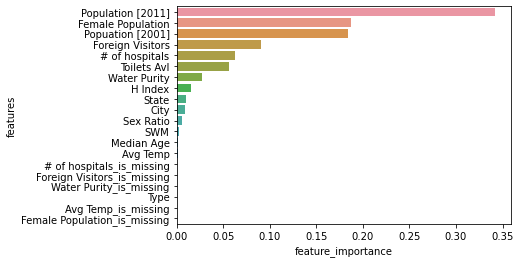

In [66]:
plot_features(X_train.columns, ideal_model.feature_importances_)


**As we can see from the above chart the population columns has more impact on the covid cases prediction**

In [67]:
sum(ideal_model.feature_importances_)

1.0